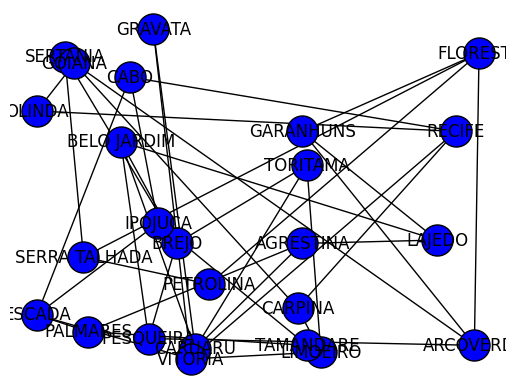

In [1]:
import math
import random
import networkx as nx
import matplotlib.pyplot as plt

cidades = [
"RECIFE", "OLINDA", "GOIANA", "CABO", "IPOJUCA", "TAMANDARE", "CARPINA", "VITORIA", "ESCADA", "LIMOEIRO",
"GRAVATA", "PALMARES", "TORITAMA", "CARUARU", "AGRESTINA", "BREJO", "BELO JARDIM", "LAJEDO",
"PESQUEIRA", "GARANHUNS", "ARCOVERDE", "SERTANIA", "SERRA TALHADA", "FLORESTA", "PETROLINA"
]
arestas = [
("PETROLINA", "FLORESTA", 278),
("PETROLINA", "SERRA TALHADA", 372),
("FLORESTA", "SERRA TALHADA", 96),
("FLORESTA", "ARCOVERDE", 182),
("FLORESTA", "GARANHUNS", 323),
("SERRA TALHADA", "SERTANIA", 120),
("SERTANIA", "ARCOVERDE", 60),
("ARCOVERDE", "GARANHUNS", 90),
("ARCOVERDE", "PESQUEIRA", 40),
("SERTANIA", "BREJO", 149),
("PESQUEIRA", "BREJO", 70),
("PESQUEIRA", "BELO JARDIM", 30),
("BREJO", "BELO JARDIM", 36),
("LAJEDO", "BELO JARDIM", 45),
("LAJEDO", "GARANHUNS", 37),
("CARUARU", "BELO JARDIM", 50),
("LAJEDO", "AGRESTINA", 56),
("CARUARU", "AGRESTINA", 20),
("CARUARU", "TORITAMA", 40),
("BREJO", "TORITAMA", 56),
("TORITAMA", "LIMOEIRO", 86),
("CARUARU", "GRAVATA", 40),
("AGRESTINA", "PALMARES", 60),
("GRAVATA", "VITORIA", 30),
("VITORIA", "LIMOEIRO", 44),
("LIMOEIRO", "CARPINA", 20),
("VITORIA", "ESCADA", 35),
("PALMARES", "ESCADA", 62),
("PALMARES", "TAMANDARE", 68),
("ESCADA", "CABO", 27),
("ESCADA", "IPOJUCA", 30),
("VITORIA", "RECIFE", 50),
("RECIFE", "CARPINA", 55),
("RECIFE", "CABO", 35),
("CABO", "IPOJUCA", 20),
("IPOJUCA", "TAMANDARE", 56),
("RECIFE", "OLINDA", 15),
("OLINDA", "GOIANA", 57),
("CARPINA", "GOIANA", 52)
]

# Criando um grafo nao direcional com as arestas
G = nx.Graph()
for parOrdenado in arestas:
  i = parOrdenado[0]
  j = parOrdenado[1]
  peso = parOrdenado[2]
  G.add_edge(i, j, weight=peso) # adiciona aresta

# definindo de forma aleatoria posicoes de cada nó do grafo
pos = {}
for cidade in cidades:
  x_vertice = random.randint(1,100)/10
  y_vertice = random.randint(1,100)/10
  pos[cidade] = (x_vertice, y_vertice)

options = {
    "font_size": 12,
    "node_size": 500,
    "node_color": "blue",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.show()

In [22]:
# Algoritmo de dijkstra
def dijkstra(grafo, inicio, destino):
    distancia = {cidade: float('inf') for cidade in grafo.nodes}
    predecessor = {cidade: None for cidade in grafo.nodes}
    distancia[inicio] = 0
    visitados = set()

    while True:
        atual = None
        menor_dist = float('inf')
        for cidade in grafo.nodes:
            if cidade not in visitados and distancia[cidade] < menor_dist:
                atual = cidade
                menor_dist = distancia[cidade]
        if atual is None or atual == destino:
            break
        visitados.add(atual)

        for vizinho in grafo.neighbors(atual):
            peso = grafo[atual][vizinho]['weight']
            nova_dist = distancia[atual] + peso
            if nova_dist < distancia[vizinho]:
                distancia[vizinho] = nova_dist
                predecessor[vizinho] = atual
    caminho = []
    cidade = destino
    while cidade is not None:
        caminho.insert(0, cidade)
        cidade = predecessor[cidade]

    return caminho, distancia[destino]

print("Bem vindo(a) ao sistema de verificacao de menor caminho usando o algoritmo de Dijkstra")
print("_"*40)
inicio = input("Insira a cidade de partida: ").upper()
destino = input("Insira a cidade de chegada: ").upper()
caminho, custo_total = dijkstra(G, inicio, destino)


print("_"*40)
print(f"\nMenor caminho de {inicio} até {destino}:")
print(" -> ".join(caminho))
print(f"Distância total: {custo_total} km")
print("_"*40)

Bem vindo(a) ao sistema de verificacao de menor caminho usando o algoritmo de Dijkstra
________________________________________
Insira a cidade de partida: belo jardim
Insira a cidade de chegada: olinda
________________________________________

Menor caminho de BELO JARDIM até OLINDA:
BELO JARDIM -> CARUARU -> GRAVATA -> VITORIA -> RECIFE -> OLINDA
Distância total: 185 km
________________________________________
